In [1]:
from nn.neural_network import NeuralNetwork

import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

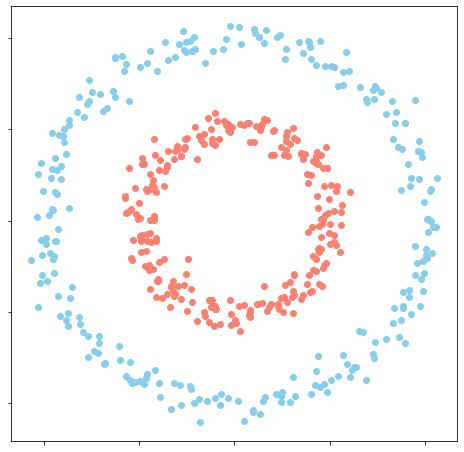

In [2]:
# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))

# Visualización de la nube de datos.
plt.scatter(X[y == 0,0], X[y == 0,1], c="skyblue")
plt.scatter(X[y == 1,0], X[y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

In [3]:
pd.DataFrame(y).value_counts()

0    250
1    250
dtype: int64

In [4]:
model = NeuralNetwork(loss_f='mse')

model.add_layer(n_conn=X.shape[1], n_neur=3, act_f='sigmoid')
model.add_layer(n_neur=1, act_f='sigmoid')

In [5]:
model.fit(X, y, epoch=2500, lr=0.01)
yp = model.predict(X)

In [6]:
model.loss_f[0](yp, y[:,np.newaxis])

0.49990453692372977

In [7]:
model.loss_f[0](yp, y[:,np.newaxis])

0.49990453692372977

In [12]:
a = np.array([
    [1],
    [2],
    [4],
    [5],
    [6],
    [7],
    [77],
    [22],
])

b = np.array([
    [13],
    [24],
    [45],
    [53],
    [62],
    [75],
    [77],
    [22]
])

In [13]:
np.mean((b - a) ** 2)

1546.625

In [14]:
c = np.array([
    [1],
    [2],
    [4],
    [5],
    [6],
    [7],
    [77],
    [22],
])

d = np.array([
    13,
    24,
    45,
    53,
    62,
    75,
    77,
    22
])

In [15]:
np.mean((d - c) ** 2)

1546.625